In [92]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [23]:
np.random.seed(77)
tf.set_random_seed(77)
n_samples = 100000
n_features = 1
n_output = 1
dtype = 'float32'
minval = -1
maxval = 1

slope = np.array([[0.5]], dtype=dtype)  # n_features * n_ouput
intercept = np.array([[5]], dtype=dtype) # n_output
noise = np.random.normal(0, 0.2, size=[n_samples, n_output]).astype(dtype)

X = np.linspace(minval, maxval, n_samples * n_features, dtype=dtype).reshape([n_samples, n_features])
y = np.matmul(X, slope) + intercept + noise

In [30]:
X_df = pd.DataFrame(data=X, columns=['X Data'])
y_df = pd.DataFrame(data=y, columns=['y'])

In [31]:
my_data = pd.concat([X_df, y_df], axis=1)

In [32]:
my_data.head()

,X Data,y
0,-1.00000,4.544889
1,-0.99998,4.632316
2,-0.99996,4.384068
3,-0.99994,4.581592
4,-0.99992,4.593336


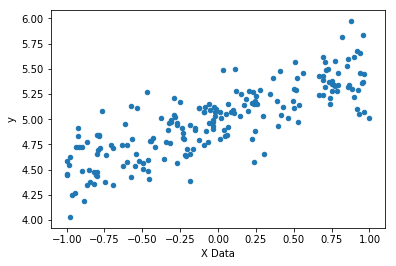

In [37]:
my_data.sample(200).plot(kind='scatter', x = 'X Data', y ='y')

In [61]:
# Hyperparamters
learning_rate = 0.01
batch_size = 8
batches = 1000
display_size = 50

In [38]:
W = tf.Variable(tf.random_normal([n_features, n_output]), name ='Weights')
b = tf.Variable(tf.random_normal([n_output]), name = 'Biases')

In [69]:
tf_X = tf.placeholder(tf.float32, shape=[None, n_features])
tf_y = tf.placeholder(tf.float32, shape=[None, n_output])

output =  tf.add(tf.matmul(tf_X, W), b)

cost = tf.reduce_mean(tf.square(tf.subtract(tf_y, output)))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [71]:
session = tf.Session()
init = tf.global_variables_initializer()
session.run(init)

In [72]:
for i in range(batches):
    
    rand_ind = np.random.randint(n_samples, size=batch_size)
    
    train_feed = {tf_X: X[rand_ind], tf_y: y[rand_ind]}
    
    _, _output, _cost = session.run([optimizer, output, cost], feed_dict=train_feed)
    
    if i % display_size == 0:
        print('Epoch : {}'.format(i), 'Cost : {}'.format(_cost), 'Cost: {}'.format(_cost), 'W: {}'.format(session.run(W)), 'b : {}'.format(session.run(b)))

Epoch : 0 Cost : 19.464441299438477 Cost: 19.464441299438477 W: [[1.0378408]] b : [0.44820458]
Epoch : 50 Cost : 2.849606513977051 Cost: 2.849606513977051 W: [[0.91406965]] b : [3.3363984]
Epoch : 100 Cost : 0.45503106713294983 Cost: 0.45503106713294983 W: [[0.7483593]] b : [4.405706]
Epoch : 150 Cost : 0.1448119431734085 Cost: 0.1448119431734085 W: [[0.67943]] b : [4.786834]
Epoch : 200 Cost : 0.05403241515159607 Cost: 0.05403241515159607 W: [[0.63310754]] b : [4.9165773]
Epoch : 250 Cost : 0.009653082117438316 Cost: 0.009653082117438316 W: [[0.58978486]] b : [4.9738317]
Epoch : 300 Cost : 0.02749369479715824 Cost: 0.02749369479715824 W: [[0.5641572]] b : [5.002465]
Epoch : 350 Cost : 0.029855877161026 Cost: 0.029855877161026 W: [[0.5482796]] b : [5.002564]
Epoch : 400 Cost : 0.01632414199411869 Cost: 0.01632414199411869 W: [[0.53293765]] b : [4.9956303]
Epoch : 450 Cost : 0.057382360100746155 Cost: 0.057382360100746155 W: [[0.5232052]] b : [5.0044127]
Epoch : 500 Cost : 0.11094767600

In [73]:
session.run(W)

array([[0.4970326]], dtype=float32)

In [74]:
session.run(b)

array([5.0000114], dtype=float32)

In [76]:
session.run(cost, feed_dict=train_feed)

0.020547565

In [80]:
train_pred = session.run(output, feed_dict={tf_X: X})

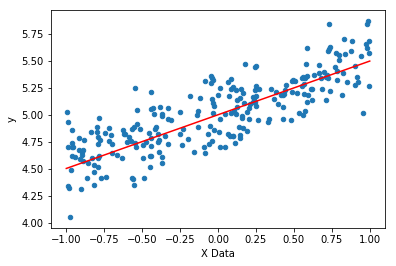

In [85]:
my_data.sample(250).plot(kind='scatter', x ='X Data', y= 'y')
plt.plot(X, train_pred, 'r')

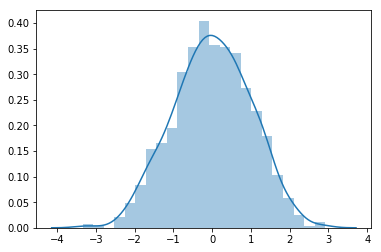

In [88]:
sns.distplot(np.random.normal(0,1, 1000))

In [89]:
tf.feature_column.numeric_column('x', shape=[1])

_NumericColumn(key='x', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)

In [96]:
feature_columns = [tf.feature_column.numeric_column('tf_X', shape=[1])]

In [97]:
estimator = tf.estimator.LinearRegressor(feature_columns=feature_columns )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\shilongz\\AppData\\Local\\Temp\\tmp_0a0ihqu', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000229A5A67240>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [99]:
input_fn = tf.estimator.inputs.numpy_input_fn({'tf_X': X_train}, y_train, batch_size=8,
                                             num_epochs=None, shuffle=True)

In [100]:
train_input_fn = tf.estimator.inputs.numpy_input_fn({'tf_X': X_train}, y_train, batch_size=8, 
                                                    num_epochs=1000, shuffle=False)

In [101]:
test_input_fn = tf.estimator.inputs.numpy_input_fn({'tf_X': X_test}, y_test, batch_size=8, 
                                                    num_epochs=1000, shuffle=False)

In [102]:
estimator.train(input_fn=input_fn, steps=500)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\shilongz\AppData\Local\Temp\tmp_0a0ihqu\model.ckpt.
INFO:tensorflow:loss = 192.03497, step = 0
INFO:tensorflow:global_step/sec: 530.828
INFO:tensorflow:loss = 32.587166, step = 100 (0.189 sec)
INFO:tensorflow:global_step/sec: 773.253
INFO:tensorflow:loss = 7.378251, step = 200 (0.129 sec)
INFO:tensorflow:global_step/sec: 730.645
INFO:tensorflow:loss = 3.1881912, step = 300 (0.138 sec)
INFO:tensorflow:global_step/sec: 725.344
INFO:tensorflow:loss = 0.71444345, step = 400 (0.137 sec)
INFO:tensorflow:Saving checkpoints for 500 into C:\Users\shilongz\AppData\Local\Temp\tmp_0a0ihqu\model.ckpt.
INFO:tensorflow:Loss for final step: 0.46003374.


In [103]:
train_metrics = estimator.evaluate(input_fn=train_input_fn, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-07-04:07:41
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\shilongz\AppData\Local\Temp\tmp_0a0ihqu\model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-05-07-04:07:42
INFO:tensorflow:Saving dict for global step 500: average_loss = 0.069565155, global_step = 500, loss = 0.55652124


In [106]:
train_metrics

{'average_loss': 0.069565155, 'global_step': 500, 'loss': 0.55652124}

In [107]:
test_metrics = estimator.evaluate(input_fn=test_input_fn, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-07-04:09:30
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\shilongz\AppData\Local\Temp\tmp_0a0ihqu\model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-05-07-04:09:31
INFO:tensorflow:Saving dict for global step 500: average_loss = 0.070496194, global_step = 500, loss = 0.56396955


In [122]:
brand_new_data = np.linspace(-1,1,10)

pred_input_fn = tf.estimator.inputs.numpy_input_fn({'tf_X': brand_new_data}, shuffle=False)

In [126]:
brand_new_data

array([-1.        , -0.77777778, -0.55555556, -0.33333333, -0.11111111,
        0.11111111,  0.33333333,  0.55555556,  0.77777778,  1.        ])

In [123]:
list(estimator.predict(input_fn= pred_input_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\shilongz\AppData\Local\Temp\tmp_0a0ihqu\model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.3385067], dtype=float32)},
 {'predictions': array([4.4475045], dtype=float32)},
 {'predictions': array([4.556502], dtype=float32)},
 {'predictions': array([4.6654997], dtype=float32)},
 {'predictions': array([4.7744975], dtype=float32)},
 {'predictions': array([4.883495], dtype=float32)},
 {'predictions': array([4.9924927], dtype=float32)},
 {'predictions': array([5.1014905], dtype=float32)},
 {'predictions': array([5.210488], dtype=float32)},
 {'predictions': array([5.3194857], dtype=float32)}]

In [124]:
predictions = []

for pred in list(estimator.predict(input_fn= pred_input_fn)):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\shilongz\AppData\Local\Temp\tmp_0a0ihqu\model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


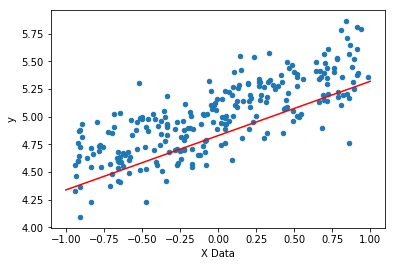

In [125]:
my_data.sample(250).plot(kind='scatter', x= 'X Data', y='y')
plt.plot(brand_new_data, predictions, 'r')